In [65]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
#import data
data = pd.read_csv('Olympic_Games/summer.csv', sep=",")
print(data)

country_data = pd.read_csv('Olympic_Games/dictionary.csv', sep=",")
print(country_data)

       Year    City      Sport Discipline Country Gender  \
0      1896  Athens   Aquatics   Swimming     AUT    Men   
1      1896  Athens   Aquatics   Swimming     AUT    Men   
2      1896  Athens   Aquatics   Swimming     GRE    Men   
3      1896  Athens   Aquatics   Swimming     GRE    Men   
4      1896  Athens   Aquatics   Swimming     GRE    Men   
...     ...     ...        ...        ...     ...    ...   
16797  2020   Tokyo  Wrestling  Wrestling     UKR  Women   
16798  2020   Tokyo  Wrestling  Wrestling     GER  Women   
16799  2020   Tokyo  Wrestling  Wrestling     USA  Women   
16800  2020   Tokyo  Wrestling  Wrestling     CHN  Women   
16801  2020   Tokyo  Wrestling  Wrestling     TUR  Women   

                              Event   Medal              Athlete  
0                    100M Freestyle  Silver     HERSCHMANN, Otto  
1                    400M Freestyle    Gold        NEUMANN, Paul  
2        100M Freestyle For Sailors  Bronze    DRIVAS, Dimitrios  
3        10

We want to Remove all the games we will not be using for this.

Then we want to combine the years we have into one dataframe

In [67]:
#Clean the data to the last three games

#Here I take the three years I want and save them 
data_2012 = data[data.Year == 2012]
data_2016 = data[data.Year == 2016]
data_2020 = data[data.Year == 2020]

#Then I combine them to make the main dataset I will be using
data = pd.concat([data_2012, data_2016, data_2020])

print(data)

       Year    City      Sport Discipline Country Gender  \
13782  2012  London   Aquatics     Diving     AUS  Women   
13783  2012  London   Aquatics     Diving     CHN    Men   
13784  2012  London   Aquatics     Diving     CHN    Men   
13785  2012  London   Aquatics     Diving     CHN    Men   
13786  2012  London   Aquatics     Diving     CHN  Women   
...     ...     ...        ...        ...     ...    ...   
16797  2020   Tokyo  Wrestling  Wrestling     UKR  Women   
16798  2020   Tokyo  Wrestling  Wrestling     GER  Women   
16799  2020   Tokyo  Wrestling  Wrestling     USA  Women   
16800  2020   Tokyo  Wrestling  Wrestling     CHN  Women   
16801  2020   Tokyo  Wrestling  Wrestling     TUR  Women   

                              Event   Medal              Athlete  
13782                  10M Platform  Silver     BROBEN, Brittany  
13783                  10M Platform  Silver              QIU, Bo  
13784                3M Springboard  Bronze            HE, Chong  
13785      

Here is sadly a wall of if statements because I could not think of anything else. 
We check each country ID from the dictionary list to our players in each game. 
This allows us to then put all players from that country and put them into a bucket.
The 9 buckets are for each year and which type of medal they won.

In [68]:
#Break the wins for each country each year

#I want to make 9 buckets that hold a year and medal type
#I am using a dictionary to also hold the country code
gold_wins_2012 = {}
gold_wins_2016 = {}
gold_wins_2020 = {}
silver_wins_2012 = {}
silver_wins_2016 = {}
silver_wins_2020 = {}
bronze_wins_2012 = {}
bronze_wins_2016 = {}
bronze_wins_2020 = {}

#I loop through all the countries then check the medal type and country.
#Here I reuse the datasets for each year to make the code slightly easier to read.
#I check Medal type and Year and take all items from that year that also match the Country
#code and put them into their bucket. 
for country_index in range(len(country_data)):

    #Golds
    if(not (data_2012.loc[(data_2012['Medal'] == 'Gold') & (data_2012['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        gold_wins_2012[country_data['Code'].loc[country_index]] = (data_2012.loc[(data_2012['Medal'] == 'Gold') & (data_2012['Country'] == (country_data['Code'].loc[country_index]))])     

    if(not (data_2016.loc[(data_2016['Medal'] == 'Gold') & (data_2016['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        gold_wins_2016[country_data['Code'].loc[country_index]] = (data_2016.loc[(data_2016['Medal'] == 'Gold') & (data_2016['Country'] == (country_data['Code'].loc[country_index]))])
    
    if(not (data_2020.loc[(data_2020['Medal'] == 'Gold') & (data_2020['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        gold_wins_2020[country_data['Code'].loc[country_index]] = (data_2020.loc[(data_2020['Medal'] == 'Gold') & (data_2020['Country'] == (country_data['Code'].loc[country_index]))])

    #Silvers
    if(not (data_2012.loc[(data_2012['Medal'] == 'Silver') & (data_2012['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        silver_wins_2012[country_data['Code'].loc[country_index]] = (data_2012.loc[(data_2012['Medal'] == 'Silver') & (data_2012['Country'] == (country_data['Code'].loc[country_index]))])
    
    if(not (data_2016.loc[(data_2016['Medal'] == 'Silver') & (data_2016['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        silver_wins_2016[country_data['Code'].loc[country_index]] = (data_2016.loc[(data_2016['Medal'] == 'Silver') & (data_2016['Country'] == (country_data['Code'].loc[country_index]))])
    
    if(not (data_2020.loc[(data_2020['Medal'] == 'Silver') & (data_2020['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        silver_wins_2020[country_data['Code'].loc[country_index]] = (data_2020.loc[(data_2020['Medal'] == 'Silver') & (data_2020['Country'] == (country_data['Code'].loc[country_index]))])

    #Bronzes
    if(not (data_2012.loc[(data_2012['Medal'] == 'Bronze') & (data_2012['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        bronze_wins_2012[country_data['Code'].loc[country_index]] = (data_2012.loc[(data_2012['Medal'] == 'Bronze') & (data_2012['Country'] == (country_data['Code'].loc[country_index]))])

    if(not (data_2016.loc[(data_2016['Medal'] == 'Bronze') & (data_2016['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        bronze_wins_2016[country_data['Code'].loc[country_index]] = (data_2016.loc[(data_2016['Medal'] == 'Bronze') & (data_2016['Country'] == (country_data['Code'].loc[country_index]))])
    
    if(not (data_2020.loc[(data_2020['Medal'] == 'Bronze') & (data_2020['Country'] == (country_data['Code'].loc[country_index]))]).empty):
        bronze_wins_2020[country_data['Code'].loc[country_index]] =(data_2020.loc[(data_2020['Medal'] == 'Bronze') & (data_2020['Country'] == (country_data['Code'].loc[country_index]))])

Then we count the total number of medales each country won for each year and type. 
This lets us get the percent of medals won per game. 
To get the total medales won we need to add the three medale types together.
Once we have the amount of medales we divide the amount of medales won by the total medales for that year.
This will give us the percent of medales won.

In [69]:
#Calculate Percent of Meadles Won By Each Country

#I put all buckets into one list in order easily loop through all of them
medals = [gold_wins_2012, gold_wins_2016, gold_wins_2020, silver_wins_2012, silver_wins_2016, silver_wins_2020, bronze_wins_2012, bronze_wins_2016, bronze_wins_2020]

#I create an empty list that will hold how many of each type of medal in each bucket
total_medals = []

#Count each type of medal in the bucket
for medal_year in range(len(medals)):
    total = 0
    for country in medals[medal_year].values():
        #print(len(country))
        total += len(country)
    total_medals.append(total)

#total_medals is stored in the order of Golds -> Silvers -> Bronzes 
#Then in each medal type 2012 -> 2016 -> 2020. 
#This is becuase it is based off of the medals list
#print(total_medals) #Golds -> Silvers -> Bronzes

#I need a list to hold the percent of medals that each country got
percents = []

#Here I loop through the 9 medals buckets
for medal_year in range(len(medals)):
    
    #I make a dictinoary that will hold <Key:Country Code, Value:Percent>
    percent_year_medal = {}
    
    #I loop through the dictionary in the current bucket and caculate the percent
    #Then add it to the new dictionary
    for country in medals[medal_year].keys():
        temp = (len(medals[medal_year].get(country)) / total_medals[medal_year])
        percent_year_medal[country] = (round((temp * 100), 2))
    
    #Lastly add the percent dictionary just made to the percent list. (Same order as medals)
    percents.append(percent_year_medal)

print(percents)

[{'ALG': 0.34, 'ARG': 0.34, 'AUS': 2.68, 'AZE': 0.67, 'BAH': 0.34, 'BLR': 1.01, 'BRA': 1.01, 'CAN': 0.34, 'CHN': 12.42, 'COL': 0.34, 'CRO': 1.01, 'CUB': 1.68, 'CZE': 1.34, 'DEN': 0.67, 'DOM': 0.34, 'ETH': 1.01, 'FRA': 3.69, 'GEO': 0.34, 'GER': 4.03, 'GRN': 0.34, 'HUN': 2.68, 'IRI': 1.68, 'IRL': 0.34, 'ITA': 2.68, 'JAM': 1.34, 'JPN': 2.35, 'KAZ': 1.01, 'KEN': 0.67, 'PRK': 1.34, 'KOR': 4.36, 'LAT': 0.34, 'LTU': 0.67, 'MEX': 0.34, 'NED': 2.01, 'NZL': 2.01, 'NOR': 0.67, 'POL': 1.01, 'RUS': 7.05, 'SLO': 0.34, 'RSA': 1.01, 'ESP': 1.34, 'SWE': 0.34, 'SUI': 0.67, 'TPE': 0.34, 'TUN': 0.67, 'TUR': 0.34, 'UGA': 0.34, 'UKR': 2.01, 'GBR': 10.07, 'USA': 15.44, 'UZB': 0.34, 'VEN': 0.34}, {'ARG': 1.0, 'ARM': 0.33, 'AUS': 2.66, 'AZE': 0.33, 'BAH': 0.33, 'BRN': 0.33, 'BLR': 0.33, 'BEL': 0.66, 'BRA': 2.33, 'CAN': 1.33, 'CHN': 8.64, 'COL': 1.0, 'CIV': 0.33, 'CRO': 1.66, 'CUB': 1.66, 'CZE': 0.33, 'DEN': 0.66, 'ETH': 0.33, 'FIJ': 0.33, 'FRA': 3.32, 'GEO': 0.66, 'GER': 5.65, 'GRE': 1.0, 'HUN': 2.66, 'INA': 0

Once we have our percent of medales won we can start to make predections.
Here I gave each year a weight.
2012 [0.11]
2016 [0.22]
2020/2021 [0.67]
The reason I gave them those numbers is so the more recent the game the more they impact the predection
The equation I used was 
(2012 Weight) * (2012 Percent) + (2016 Weight) * (2016 Percent) + (2020 Weight) * (2020 Percent)

In [75]:
#Make Predections
#Predections = Golds -> Silvers -> Bronzes 
#              0 1 2    3 4 5      6 7 8      

year_weights = [0.11, 0.22, 0.67] #We want the most recent games to be the most important then decreasing value over time

#I need to finally calculate the prediction for each country and what percent of medals they might win.
#To do this I need to save the medal chances with country codes in dictonaries. 
prediction_bronze = {}
prediction_silver = {}
prediction_gold = {}
prediction_total = {}

#For this I want to get the chance for all Countries.
#Even the ones that did not get any medals so I need to loop through all 
#countries again.
for country_num in range(len(country_data)):
    
    #Here I quickly just grab and store the country code and name in order
    #to not recall the same lines of code
    country_id = country_data['Code'].loc[country_num]
    country_name = country_data['Country'].loc[country_num]

    #For each one I create chance of 0 to start
    gold_predection = 0

    #Then I add each (year weight)*(opercent of that year)
    #to the the chance I just created
    if country_id in percents[0]:
        gold_predection += year_weights[0] * percents[0].get(country_id)
    if country_id in percents[1]:
        gold_predection += year_weights[1] * percents[1].get(country_id)
    if country_id in percents[2]:
        gold_predection += year_weights[2] * percents[2].get(country_id)
    
    #I then round the number to do digits to make the data uniform
    gold_predection = round(gold_predection, 2)

    #Finally I add the chance that I created to the dictionary with 
    # <Key: Country Name, Value: Percent of Medals that might be won>
    prediction_gold[country_name] = gold_predection

    #I repeat this for silver and bronze

    silver_predection = 0

    if country_id in percents[3]:
        silver_predection += year_weights[0] * percents[3].get(country_id)
    if country_id in percents[4]:
        silver_predection += year_weights[1] * percents[4].get(country_id)
    if country_id in percents[5]:
        silver_predection += year_weights[2] * percents[5].get(country_id)
    
    silver_predection = round(silver_predection, 2)
    prediction_silver[country_name] = silver_predection

    bronze_predection = 0

    if country_id in percents[6]:
        bronze_predection += year_weights[0] * percents[6].get(country_id)
    if country_id in percents[7]:
        bronze_predection += year_weights[1] * percents[7].get(country_id)
    if country_id in percents[8]:
        bronze_predection += year_weights[2] * percents[8].get(country_id)
    
    bronze_predection = round(bronze_predection, 2)
    prediction_bronze[country_name] = bronze_predection


#I then save each dictionary into a DataFrame
final_prediction = pd.DataFrame.from_dict(prediction_bronze, orient='index')
final_prediction.columns = ['Bronze']
prediction_silver = pd.DataFrame.from_dict(prediction_silver, orient='index')
prediction_gold = pd.DataFrame.from_dict(prediction_gold, orient='index')

final_prediction['Silver'] = prediction_silver
final_prediction['Gold'] = prediction_gold

#I made a copy in order to also give the total metals each country might win. 
final_totals = final_prediction.copy() #We want to make a copy before we add the total column becuase it
                                       #creates a bug of some kind

#I add a final total column that will take the average of the three medal types
final_prediction['Total'] = round((final_prediction.sum(axis=1) / 3), 2)
final_prediction.index.name = 'Country'
final_prediction.reset_index(inplace=True)

#print(final_prediction)
#print(final_prediction.loc["United States"])
#print(final_prediction.sum())

#Here I do the same as above just not taking the average number of medals
final_totals['Total'] = final_totals.sum(axis=1)

#I then calculate the total number of medals each country would win by turning the percents
#back into 0.__ form and then multiply by the 408 events in this years Olympics.
#Finally I round off the numbers since you can't win half a medal
final_totals[final_totals.select_dtypes(include=['number']).columns] = final_totals[final_totals.select_dtypes(include=['number']).columns] / 100
final_totals[final_totals.select_dtypes(include=['number']).columns] *= 408
final_totals[final_totals.select_dtypes(include=['number']).columns] = round(final_totals[final_totals.select_dtypes(include=['number']).columns])

final_totals = final_totals.astype(int)

final_totals.index.name = 'Country'
final_totals.reset_index(inplace=True)

#print(final_totals)
#print(final_totals.loc["United States"])
#print(final_totals.sum())

In [76]:
#Before I save the files I want to sort the data frames where the countries
#that are likely to win more are at the top. 

final_prediction = final_prediction.sort_values(by=['Total', 'Gold', 'Silver', 'Bronze'], ascending=False)
final_totals = final_totals.sort_values(by=['Total', 'Gold', 'Silver', 'Bronze'], ascending=False)

In [77]:
#Here I save the two DataFrames to files to look at easily without needing to run the code
final_prediction.to_csv("Percent_of_Medles_Won")
final_totals.to_csv("Number_of_Medals_Won")

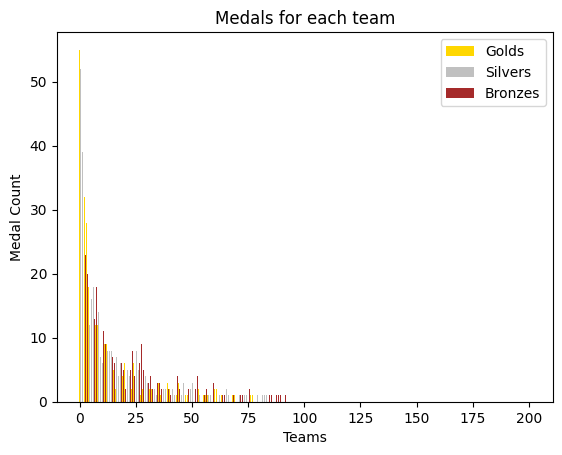

In [78]:
#With Everything saved Lets make some graphs

barWidth = 0.25

teams = final_totals.loc[: ,"Country"] #Get the teams
golds = final_totals.loc[: ,"Gold"]
silvers = final_totals.loc[: ,"Silver"]
bronzes = final_totals.loc[: ,"Bronze"]

br1 = np.arange(len(golds)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, golds, color = 'gold', width = barWidth, label = 'Golds')
plt.bar(br2, silvers, color = 'silver', width = barWidth, label = 'Silvers')
plt.bar(br3, bronzes, color = 'brown', width = barWidth, label = 'Bronzes')

plt.xlabel("Teams")
plt.ylabel("Medal Count")
plt.title("Medals for each team")

plt.legend()
plt.show()

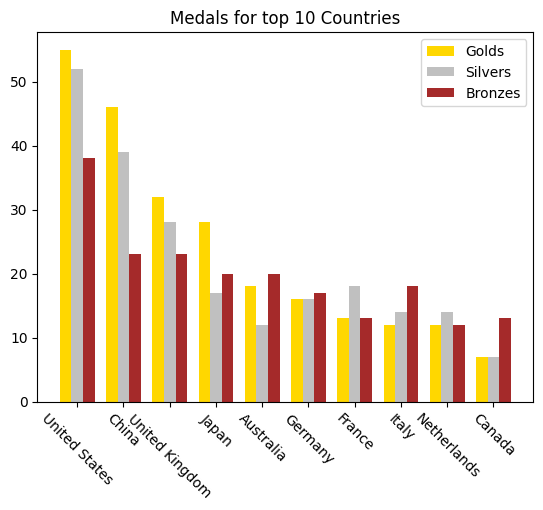

In [79]:
barWidth = 0.25

x = 10 #Number of top teams we want to grab

teams = teams.head(x) #Get the top x teams
golds = golds.head(x)
silvers = silvers.head(x)
bronzes = bronzes.head(x)

br1 = np.arange(len(golds)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, golds, color = 'gold', width = barWidth, label = 'Golds')
plt.bar(br2, silvers, color = 'silver', width = barWidth, label = 'Silvers')
plt.bar(br3, bronzes, color = 'brown', width = barWidth, label = 'Bronzes')

plt.title("Medals for top 10 Countries")
plt.xticks([r + barWidth for r in range(len(golds))], teams, rotation=-45)


plt.legend()
plt.show()

This Updated Graph from the one I made in Try one has a complete diffrent Top 10

While 1st and 2nd are the same 3rd and 4th switched places.

And Russia is just not in the top 10 anymore and Canada took it's place.
Looking at all the data Russia went down to 12th.